In [1]:

import matplotlib.pyplot as plt
import numpy as np

import torch


from torchvision import datasets, transforms

# PyTorch: –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ (Autograd)

## –û—Å–Ω–æ–≤–Ω—ã–µ –ø–æ–Ω—è—Ç–∏—è

### –ß—Ç–æ —Ç–∞–∫–æ–µ `requires_grad`?
- –§–ª–∞–≥ `requires_grad=True` —É–∫–∞–∑—ã–≤–∞–µ—Ç PyTorch –æ—Ç—Å–ª–µ–∂–∏–≤–∞—Ç—å –æ–ø–µ—Ä–∞—Ü–∏–∏ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
- –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é: `requires_grad=False`
- –ì—Ä–∞–¥–∏–µ–Ω—Ç—ã –Ω–∞–∫–∞–ø–ª–∏–≤–∞—é—Ç—Å—è –≤ –∞—Ç—Ä–∏–±—É—Ç–µ `.grad` —Ç–µ–Ω–∑–æ—Ä–∞

### –í—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–π –≥—Ä–∞—Ñ
PyTorch —Å—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ –≤—ã—á–∏—Å–ª–µ–Ω–∏–π –¥–ª—è –æ–ø–µ—Ä–∞—Ü–∏–π —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö `requires_grad=True`




In [2]:
import torch

# x = torch.Tensor(2, 6)
x = torch.rand(2, 6, requires_grad=True)
y = torch.rand(2, 6, requires_grad=True)

print(x.grad, y.grad)

None None


In [3]:
x.shape

torch.Size([2, 6])

In [4]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
y = torch.arange(3, dtype=torch.float32, requires_grad=True)
z = (x + y).sum()

z.backward()

print(x.grad, y.grad)

tensor([1., 1., 1.]) tensor([1., 1., 1.])


In [6]:
import torch

x = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)

# –ü—Ä–æ—Å—Ç–∞—è —Ñ—É–Ω–∫—Ü–∏—è
y = x**2 + 2*x + 1

# –°—É–º–º–∏—Ä—É–µ–º, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Å–∫–∞–ª—è—Ä
z = y.sum()
z.backward()

print("x:", x)
print("y:", y)
print("–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã:", x.grad)


x: tensor([2., 3., 4.], requires_grad=True)
y: tensor([ 9., 16., 25.], grad_fn=<AddBackward0>)
–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã: tensor([ 6.,  8., 10.])


In [8]:
# –ü—Ä–∏–º–µ—Ä –¥–ª—è –ø–µ—Ä—Å–µ–ø—Ç—Ä–æ–Ω–∞

x = torch.rand(4, 3)
# –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
y_true = torch.rand(4, 2)

W = torch.rand(3, 2, requires_grad=True)
b = torch.rand(2, requires_grad=True)

# Forward
y_pred = x @ W + b  # (–ø–µ—Ä—Ü–µ–ø—Ç—Ä–æ–Ω –±–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏)

# –ü–æ—Å—á–∏—Ç–∞–µ–º –∑–¥–µ—Å—å Loss
# –ò—Å–ø–æ–ª—å–∑—É–µ–º MSE
loss = torch.mean((y_pred - y_true) ** 2)

print("Loss:", loss.item())

loss.backward()

print("\n–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã W:\n", W.grad)
print("–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã b:\n", b.grad)


Loss: 0.40471145510673523

–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã W:
 tensor([[0.0591, 0.3956],
        [0.1502, 0.4755],
        [0.1324, 0.3042]])
–ì—Ä–∞–¥–∏–µ–Ω—Ç—ã b:
 tensor([0.1325, 0.7304])


# –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö CIFAR-10

## –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ CIFAR-10

CIFAR-10 - —ç—Ç–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π:
- **60,000 —Ü–≤–µ—Ç–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π** —Ä–∞–∑–º–µ—Ä–æ–º 32x32 –ø–∏–∫—Å–µ–ª—è
- **10 –∫–ª–∞—Å—Å–æ–≤** –æ–±—ä–µ–∫—Ç–æ–≤
- **50,000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π** –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
- **10,000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π** –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è


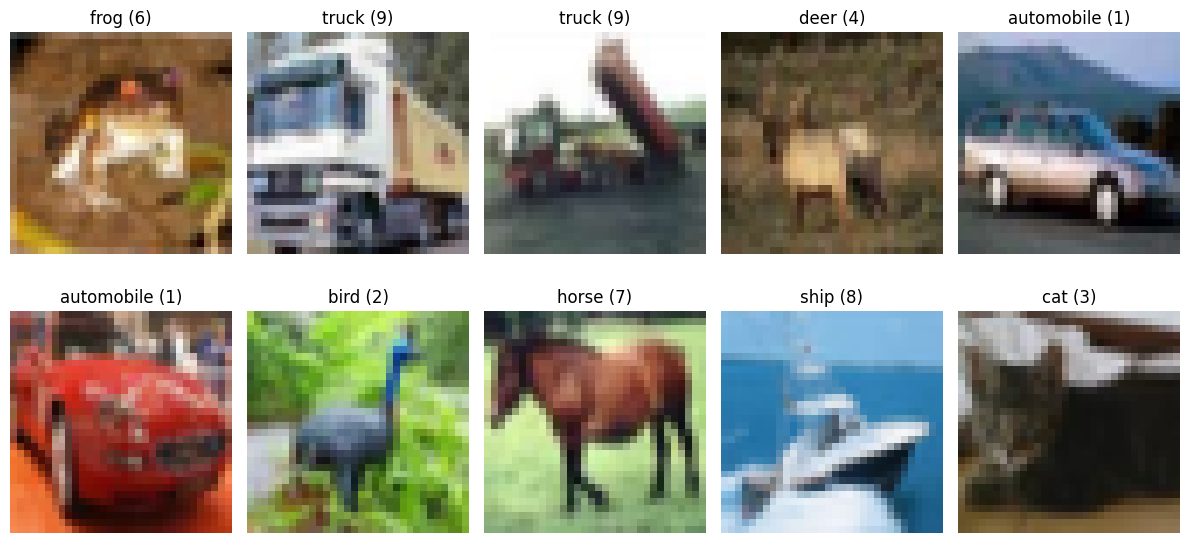

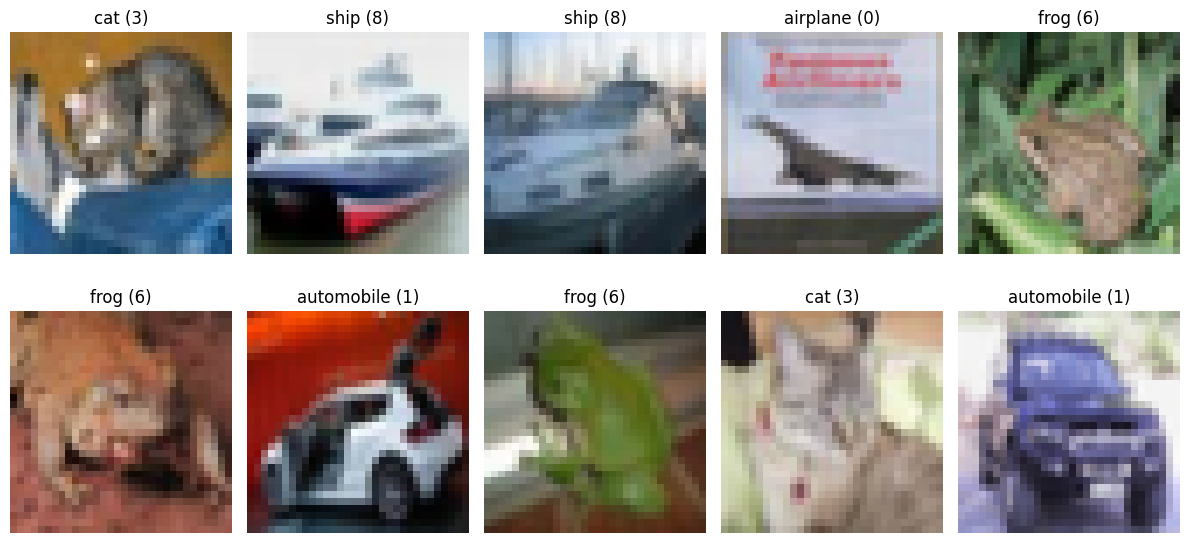

In [9]:
# –ü–æ–¥–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è

from torchvision import datasets

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=None)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=None)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

def show_images(dataset, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    for i in range(num_images):
        image, label = dataset[i]
        
        axes[i].imshow(image)
        axes[i].set_title(f'{classes[label]} ({label})')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()


show_images(train_dataset)

show_images(test_dataset)

In [10]:
print("–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:", len(train_dataset))
print("–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:", len(test_dataset))

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: 50000
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞: 10000


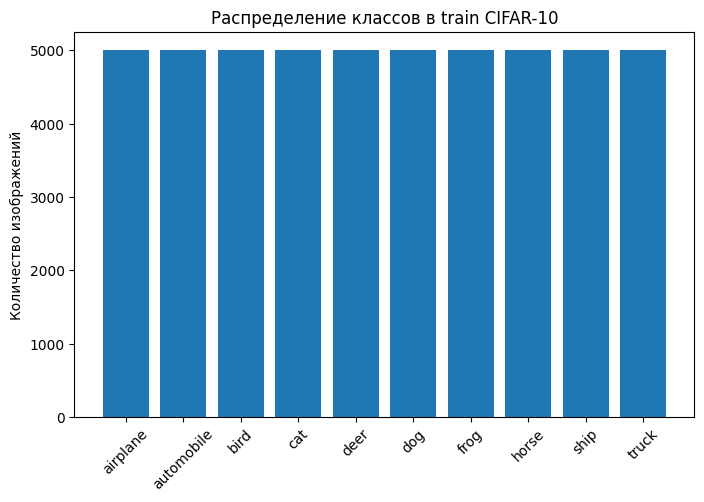

In [11]:
from collections import Counter

train_labels = [label for _, label in train_dataset]
class_counts = Counter(train_labels)

plt.figure(figsize=(8,5))
plt.bar(classes, [class_counts[i] for i in range(10)])
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ train CIFAR-10")
plt.xticks(rotation=45)
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π")
plt.show()


## –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏

In [12]:
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=None)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

# plt.imshow(train_dataset[0][0])
print(len(train_dataset))
print(train_dataset[1])

image_test = train_dataset[0][0]

print(np.array(image_test).shape)
print(32*32*3)

50000
(<PIL.Image.Image image mode=RGB size=32x32 at 0x2795B9F9750>, 9)
(32, 32, 3)
3072


In [13]:
from torch import nn

from torch.optim import Adam

class TestMLP(nn.Module):
    def __init__(self, num_input, num_output):
        super().__init__()
        self.linear_1 = nn.Linear(num_input, 32)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(32, 64)
        self.linear_3 = nn.Linear(64, num_output)
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear_1(x)

        x = self.relu(x)
        x = self.linear_2(x)
        x = self.relu(x)
        x = self.linear_3(x)
        x = self.softmax(x)
        
        return x



model = TestMLP(32*32*3, 10)

test_image = torch.randn(1,32*32*3)
print(test_image.shape)

print(model(test_image))


torch.Size([1, 3072])
tensor([[0.0936, 0.1059, 0.0937, 0.0777, 0.0911, 0.1002, 0.1217, 0.1011, 0.0772,
         0.1379]], grad_fn=<SoftmaxBackward0>)


c:\Users\User\anaconda3\envs\neural_networks\Lib\site-packages\torch\nn\modules\module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


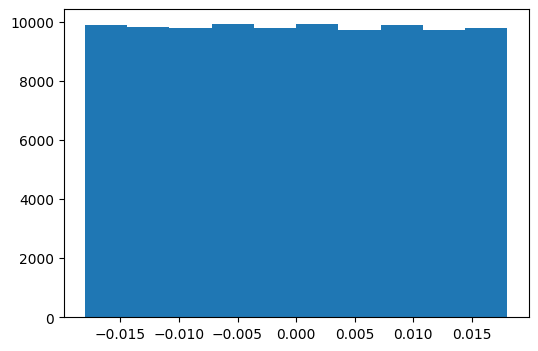

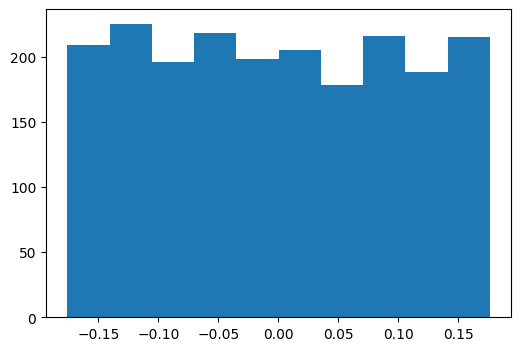

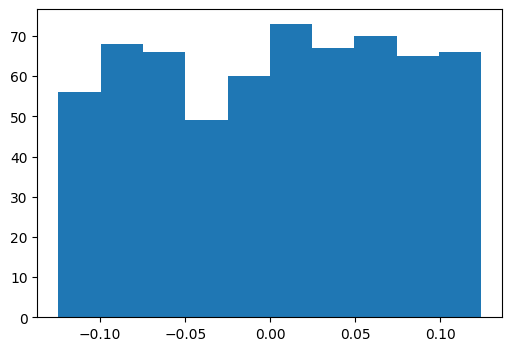

In [14]:
# –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –ø–æ —Å–ª–æ—è–º

import matplotlib.pyplot as plt

for name, param in model.named_parameters():
    if "weight" in name:
        plt.figure(figsize=(6,4))
        plt.hist(param.detach().numpy().flatten())
        plt.show()


In [16]:
# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è

from torchvision import datasets, transforms
from tqdm import tqdm

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


model = TestMLP(32*32*3, 10)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        loss.backward()
        
        optimizer.step()
        
    print(f'loss: {sum(train_losses)/ len(train_losses)}')
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {sum(train_losses)/ len(train_losses)}')


  0%|          | 0/782 [00:00<?, ?it/s]c:\Users\User\anaconda3\envs\neural_networks\Lib\site-packages\torch\nn\modules\module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:06<00:00, 127.52it/s]


loss: 2.167645215988159
Epoch [1/5], Loss: 2.167645215988159


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:05<00:00, 131.08it/s]


loss: 2.1394505500793457
Epoch [2/5], Loss: 2.1394505500793457


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:05<00:00, 131.02it/s]


loss: 2.1255764961242676
Epoch [3/5], Loss: 2.1255764961242676


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:06<00:00, 126.95it/s]


loss: 2.116469383239746
Epoch [4/5], Loss: 2.116469383239746


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:05<00:00, 140.80it/s]

loss: 2.1093034744262695
Epoch [5/5], Loss: 2.1093034744262695


In [17]:

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 37.07%


# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –≤–µ—Å–æ–≤ –Ω–µ–π—Ä–æ—Å–µ—Ç–µ–π

–ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π –æ—á–µ–Ω—å –≤–∞–∂–Ω–æ, **–∫–∞–∫ –∑–∞–¥–∞–Ω—ã –Ω–∞—á–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤**.  

–ï—Å–ª–∏ –≤—ã–±—Ä–∞—Ç—å –∏—Ö –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ:
- üõë –°–µ—Ç—å –º–æ–∂–µ—Ç **–Ω–µ —É—á–∏—Ç—å—Å—è** (–Ω–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –≤—Å–µ –≤–µ—Å–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ ‚Üí –Ω–µ—Ç —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –Ω–µ–π—Ä–æ–Ω–∞–º–∏)  
- üê¢ –û–±—É—á–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å **–æ—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω—ã–º** (—Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–µ –≤–µ—Å–∞ ‚Üí —Å–∏–≥–Ω–∞–ª—ã –∑–∞—Ç—É—Ö–∞—é—Ç)  
- üí• –ú–æ–∂–µ—Ç –≤–æ–∑–Ω–∏–∫–Ω—É—Ç—å —ç—Ñ—Ñ–µ–∫—Ç **–≤–∑—Ä—ã–≤–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤** (—Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∏–µ –≤–µ—Å–∞ ‚Üí –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã —Ä–∞—Å—Ç—É—Ç –±–µ–∑ –∫–æ–Ω—Ç—Ä–æ–ª—è)  

---

## –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏

1. **Constant** ‚Äî –≤—Å–µ –≤–µ—Å–∞ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ  
   ‚û°Ô∏è –¥–µ–º–æ–Ω—Å—Ç—Ä–∞—Ü–∏—è —Ç–æ–≥–æ, —á—Ç–æ —Å–µ—Ç—å –ø–µ—Ä–µ—Å—Ç–∞—ë—Ç –æ–±—É—á–∞—Ç—å—Å—è  

2. **–ù–∏–∑–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è** (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Normal(0, 0.01)`)  
   ‚û°Ô∏è —Å–µ—Ç—å —É—á–∏—Ç—Å—è –æ—á–µ–Ω—å –º–µ–¥–ª–µ–Ω–Ω–æ, —Å–∏–≥–Ω–∞–ª—ã –ø–æ—á—Ç–∏ –∏—Å—á–µ–∑–∞—é—Ç  

3. **–í—ã—Å–æ–∫–∞—è –¥–∏—Å–ø–µ—Ä—Å–∏—è** (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Normal(0, 1)`)  
   ‚û°Ô∏è —Å–µ—Ç—å –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–∞, –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –≤–∑—Ä—ã–≤–∞—é—Ç—Å—è  

4. **Xavier (Glorot)**  
   - –ø–æ–¥–±–∏—Ä–∞–µ—Ç –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤–µ—Å–æ–≤ —Ç–∞–∫, —á—Ç–æ–±—ã —Å–∏–≥–Ω–∞–ª—ã —Å–æ—Ö—Ä–∞–Ω—è–ª–∏ –º–∞—Å—à—Ç–∞–± –ø—Ä–∏ –ø—Ä–æ—Ö–æ–∂–¥–µ–Ω–∏–∏ —á–µ—Ä–µ–∑ —Å–ª–æ–∏  
   - —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–ª—è `tanh` –∏ `sigmoid`  

5. **He (Kaiming)**  
   - –º–æ–¥–∏—Ñ–∏–∫–∞—Ü–∏—è Xavier –ø–æ–¥ `ReLU`  
   - —É—á–∏—Ç—ã–≤–∞–µ—Ç, —á—Ç–æ —á–∞—Å—Ç—å –Ω–µ–π—Ä–æ–Ω–æ–≤ –æ–±–Ω—É–ª—è–µ—Ç—Å—è  
   - —Ñ–æ—Ä–º—É–ª–∞ –¥–∏—Å–ø–µ—Ä—Å–∏–∏:  



In [18]:

import torch.nn.init as init

class NetworkMLP(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs, act_fn=nn.Sigmoid()):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = act_fn
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        z1 = self.linear1(x)
        a1 = self.act_fn(z1)
        z2 = self.linear2(a1)
        return z1, a1, z2

In [19]:
def initialize_weights(model, mode="xavier"):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            if mode == "constant":
                init.constant_(m.weight, 0.01)
            elif mode == "low_var":
                init.normal_(m.weight, mean=0.0, std=0.01)
            elif mode == "high_var":
                init.normal_(m.weight, mean=0.0, std=1.0)
            elif mode == "xavier":
                init.xavier_uniform_(m.weight)
            elif mode == "he":
                init.kaiming_uniform_(m.weight, nonlinearity="relu")
            if m.bias is not None:
                init.constant_(m.bias, 0)


def plot_layer_distributions(model, title):
    """–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Å–æ–≤ –ø–æ —Å–ª–æ—è–º"""
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    layers = [model.linear1, model.linear2]

    for i, layer in enumerate(layers):
        weights = layer.weight.detach().cpu().numpy().flatten()
        axs[i].hist(weights, bins=50)
        axs[i].set_title(f"{title} | Layer {i+1}\nmean={weights.mean():.4f}, std={weights.std():.4f}")

    plt.tight_layout()
    plt.show()

def plot_activation_distributions(model, mode):
    """–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–π"""
    x = torch.randn(128, 3*32*32)
    with torch.no_grad():
        z1, a1, z2 = model(x)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, (data, name) in enumerate([(z1, "z1 pre-activation"),
                                      (a1, "a1 post-activation"),
                                      (z2, "z2 output")]):
        arr = data.cpu().numpy().flatten()
        axs[i].hist(arr, bins=50)
        axs[i].set_title(f"{mode} | {name}\nmean={arr.mean():.4f}, std={arr.std():.4f}")
    plt.tight_layout()
    plt.show()


=== CONSTANT INITIALIZATION ===


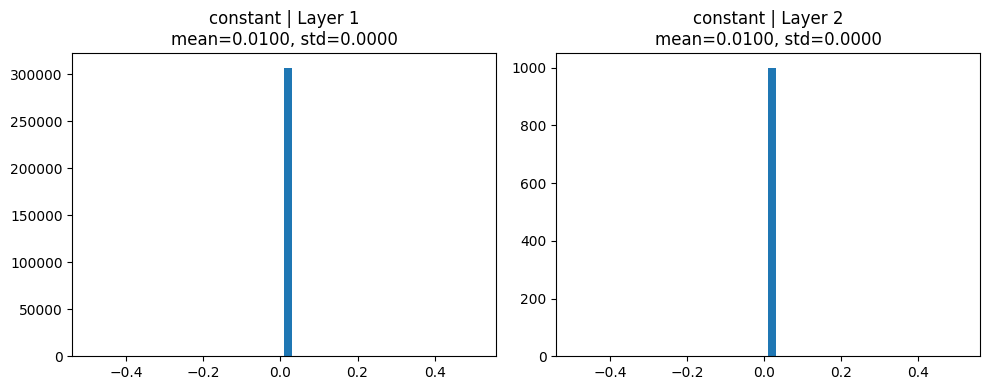

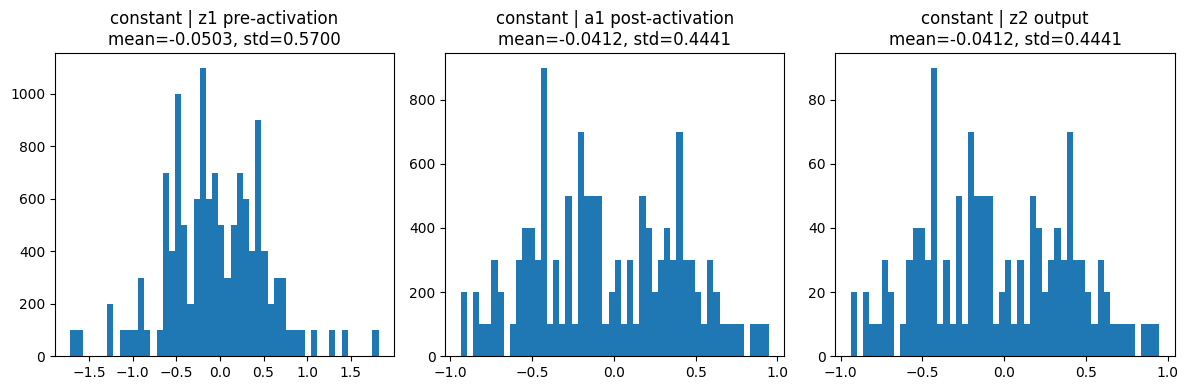


=== LOW_VAR INITIALIZATION ===


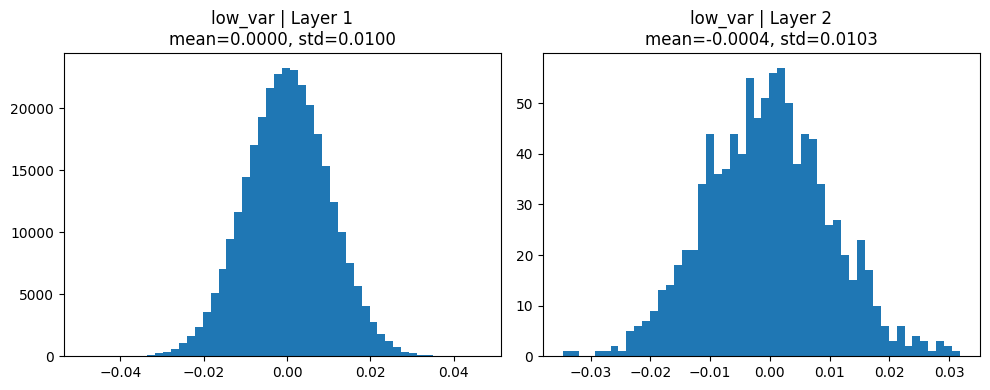

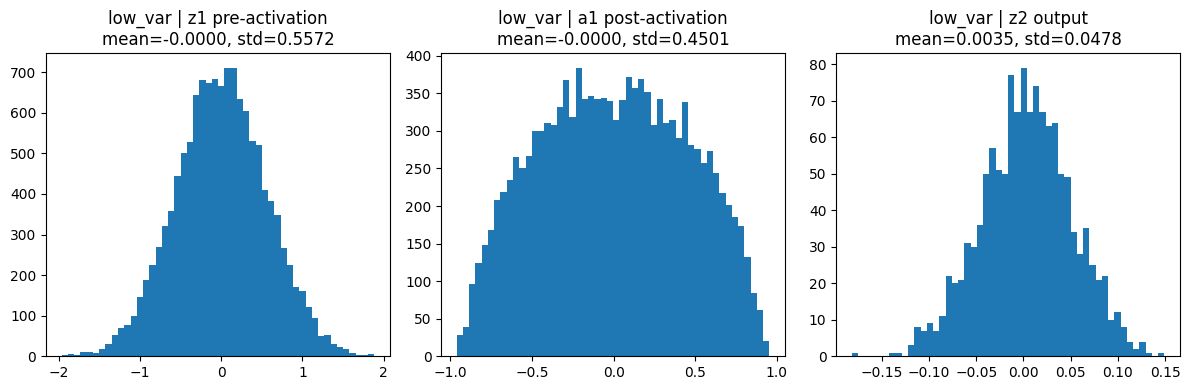


=== HIGH_VAR INITIALIZATION ===


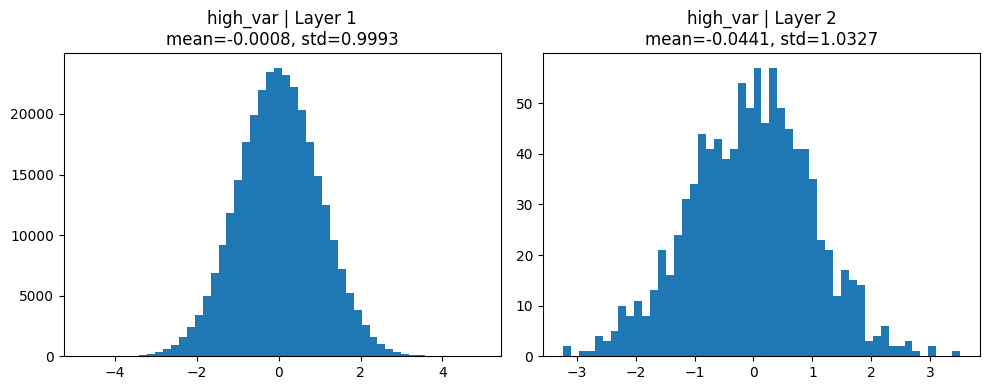

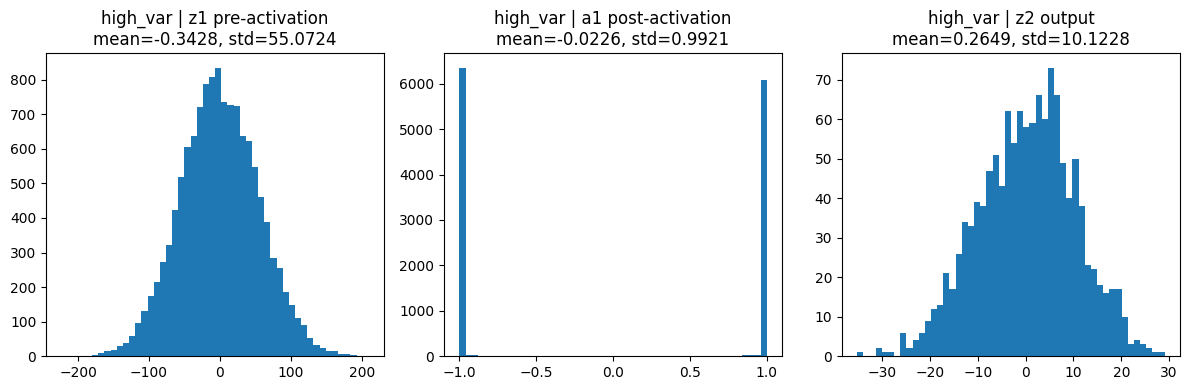


=== XAVIER INITIALIZATION ===


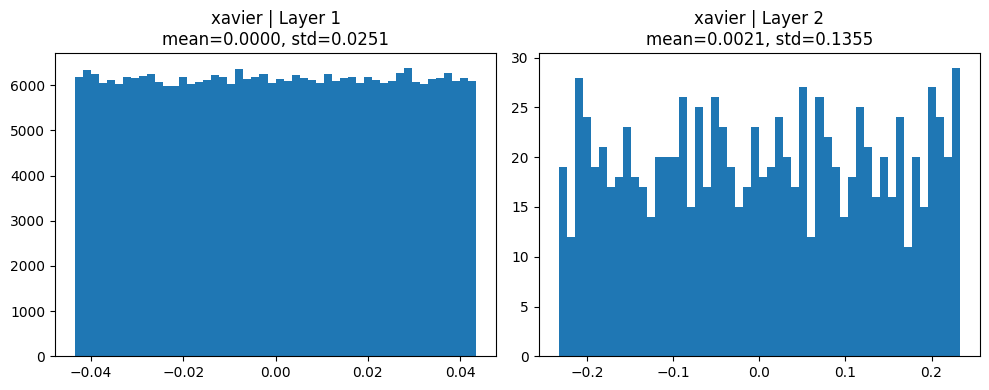

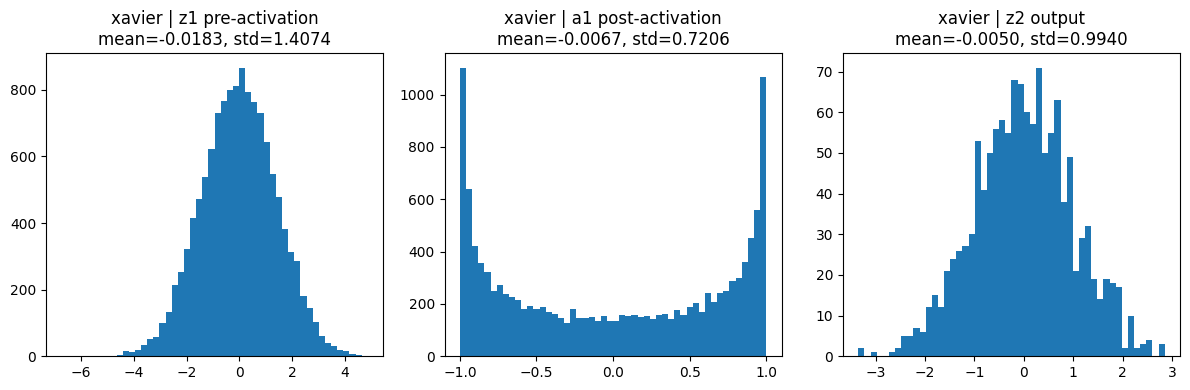


=== HE INITIALIZATION ===


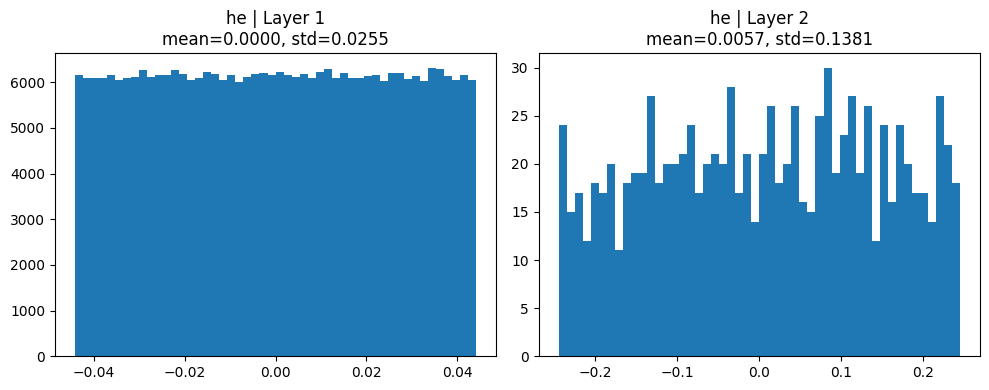

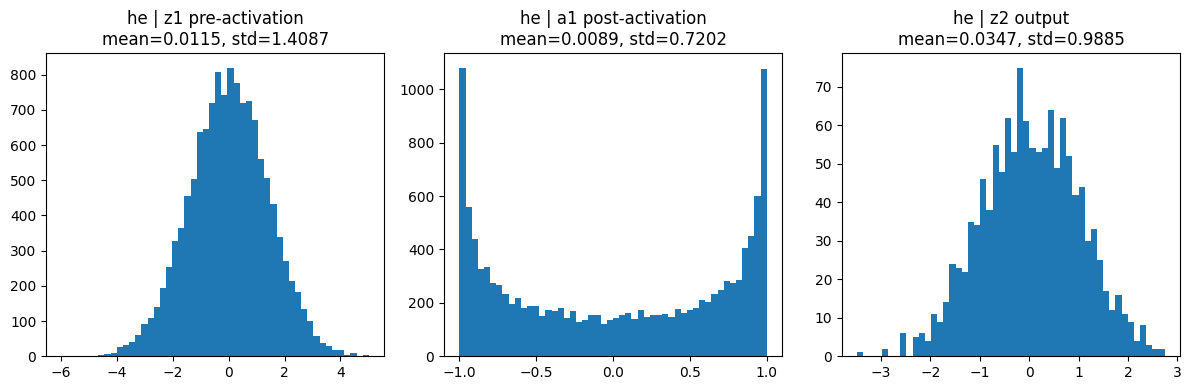

In [20]:
modes = ["constant", "low_var", "high_var", "xavier", "he"]

for mode in modes:
    print(f"\n=== {mode.upper()} INITIALIZATION ===")
    model = NetworkMLP(3*32*32, 100, 10, act_fn=nn.Tanh())
    initialize_weights(model, mode=mode)

    # –í–µ—Å–∞ –ø–æ —Å–ª–æ—è–º
    plot_layer_distributions(model, mode)

    # –ê–∫—Ç–∏–≤–∞—Ü–∏–∏
    plot_activation_distributions(model, mode)

# –°–≤–µ—Ä—Ç–æ—á–Ω–∞—è –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (32, 32, 32)
        self.pool = nn.MaxPool2d(2, 2)                           # (32, 16, 16)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # (64, 16, 16)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        # –ø–µ—Ä–≤—ã–π —Å–ª–æ–π
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        # –≤—Ç–æ—Ä–æ–π —Å–ª–æ–π
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = ConvNet()

test_tensor = torch.randn(1, 3, 32 ,32)

model(test_tensor)

tensor([[-0.1249,  0.0574, -0.0561, -0.0424,  0.0028,  0.0391,  0.0941, -0.0123,
          0.0878, -0.0493]], grad_fn=<AddmmBackward0>)

In [23]:
# –¶–∏–∫–ª –æ–±—É—á–µ–Ω–∏—è
from torchvision import datasets, transforms
from tqdm import tqdm

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    
    for images, labels in tqdm(train_loader):
        
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        train_losses.append(loss)
        loss.backward()
        
        optimizer.step()
        
    print(f'loss: {sum(train_losses)/ len(train_losses)}')
        # —Å—á–∏—Ç–∞–µ–º –ª–æ—Å—Å –∏ –æ–±–Ω–æ–≤–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {sum(train_losses)/ len(train_losses)}')


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:16<00:00, 47.40it/s]


loss: 1.452958583831787
Epoch [1/5], Loss: 1.452958583831787


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:16<00:00, 47.44it/s]


loss: 1.2729073762893677
Epoch [2/5], Loss: 1.2729073762893677


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:16<00:00, 47.57it/s]


loss: 1.1610711812973022
Epoch [3/5], Loss: 1.1610711812973022


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:16<00:00, 46.88it/s]


loss: 1.0830491781234741
Epoch [4/5], Loss: 1.0830491781234741


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 782/782 [00:16<00:00, 48.01it/s]

loss: 1.0199922323226929
Epoch [5/5], Loss: 1.0199922323226929


In [24]:

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

Accuracy: 46.29%


–í PyTorch **–Ω–µ—Ç –æ—Ç–¥–µ–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏** —Å –Ω–∞–∑–≤–∞–Ω–∏–µ–º `global_avg_pool2d`.  

–í–º–µ—Å—Ç–æ —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç **–∞–¥–∞–ø—Ç–∏–≤–Ω–æ–µ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ**, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∑–∞–¥–∞—Ç—å –ª—é–±–æ–π —Ä–∞–∑–º–µ—Ä –≤—ã—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–Ω–∑–æ—Ä–∞:  

- –§—É–Ω–∫—Ü–∏—è: `torch.nn.functional.adaptive_avg_pool2d`  
- –°–ª–æ–π: `nn.AdaptiveAvgPool2d`  

–ï—Å–ª–∏ –∑–∞–¥–∞—Ç—å `output_size=1`, —Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç **Global Average Pooling** –ø–æ –≤—Å–µ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º.


In [32]:
# –ú–æ–¥–µ–ª—å —Å global avg pooling

import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNetGAP(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (32, 32, 32)
        self.pool = nn.MaxPool2d(2, 2)                           # (32, 16, 16)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # (64, 16, 16)
        self.relu = nn.ReLU()

        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # –ø–µ—Ä–≤—ã–π —Å–ª–æ–π
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # –≤—Ç–æ—Ä–æ–π —Å–ª–æ–π
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)   # (batch, 64, 8, 8)

        # Global Average Pooling 
        x = F.adaptive_avg_pool2d(x, 1)  # (batch, 64, 1, 1)
        x = x.view(x.size(0), -1)        # (batch, 64)

        # –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è
        x = self.fc(x)
        return x

# –ü—Ä–æ–≤–µ—Ä–∫–∞
model = ConvNetGAP()
test_tensor = torch.randn(1, 3, 32, 32)
out = model(test_tensor)

print("–í—ã—Ö–æ–¥ –º–æ–¥–µ–ª–∏:", out.shape)  # (1, 10)


–í—ã—Ö–æ–¥ –º–æ–¥–µ–ª–∏: torch.Size([1, 10])


–ó–∞–¥–∞—á–∞ 1

—Å–æ–∑–¥–∞–π—Ç–µ —Å–µ—Ç—å —Ä–æ–≤–Ω–æ —Å —Ç—Ä–µ–º—è —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–º–∏ —Å–ª–æ—è–º–∏
–ü–µ—Ä–≤—ã–π —Å–ª–æ–π: 3 –∫–∞–Ω–∞–ª–∞ ‚Üí 16 –∫–∞–Ω–∞–ª–æ–≤
–í—Ç–æ—Ä–æ–π —Å–ª–æ–π: 16 ‚Üí 32
–¢—Ä–µ—Ç–∏–π —Å–ª–æ–π: 32 ‚Üí 64

–í –∫–æ–Ω—Ü–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å Global Average Pooling.

–ó–∞–¥–∞—á–∞ 2

—Å–æ–∑–¥–∞–π—Ç–µ CNN –≥–¥–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∏–ª—å—Ç—Ä–æ–≤ —Å–Ω–∞—á–∞–ª–∞ —Ä–∞—Å—Ç–µ—Ç, –ø–æ—Ç–æ–º —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è
–ü—Ä–∏–º–µ—Ä: 3 ‚Üí 32 ‚Üí 64 ‚Üí 128 ‚Üí 64 ‚Üí 32 ‚Üí 10

–£—Å–ª–æ–≤–∏–µ: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å–≤–µ—Ä—Ç–∫–∏ –≤ —Ä–∞—Å—Ç—É—â–µ–π –∏ —É–±—ã–≤–∞—é—â–µ–π —á–∞—Å—Ç—è—Ö